In [1]:
import numpy as np

## Load mnist data using sci-kit learn

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
data, label = mnist['data'], mnist['target']

In [4]:
print(type(data))
label[:10]

<class 'pandas.core.frame.DataFrame'>


0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Let's look at the size of data and target

In [5]:
print(data.shape)
print(label.shape)

(70000, 784)
(70000,)


The dataset consist of 70000 images and each image has 784 features, of hand written digit with size of 28x28 

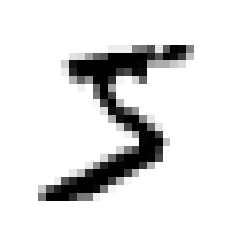

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

sample_digit = data.iloc[0].to_numpy()
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(sample_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()


Labels are in type of string so convert it into integers

In [7]:
label = label.astype(np.uint8)
label[:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: uint8

Let split the data set into train and test sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        data, 
        label, 
        test_size=0.14, 
        shuffle=True)

# Binary classification

Try to identify one digit (1 vs all)

In [9]:
# filter pandas label series by masking and convert it for binary classification

y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

y_train_5

43437    False
55497    False
47454    False
60086    False
32672    False
         ...  
17969    False
23006     True
67297    False
10438    False
58944    False
Name: class, Length: 60199, dtype: bool

Out of 70000 images, 9801 hand written images are labelled as 5

## let try with SGDClassifier

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier()

In [25]:
sgd_classifier.predict([data.loc[0]])

/home/saheen/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Measure accuracy using cross validation

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96646235, 0.96441742, 0.93496462])

Overall accuracy is good but try to classify non-5 class

In [15]:
from sklearn.base import BaseEstimator

class Non_5_classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [16]:
non_5_classifier = Non_5_classifier()
cross_val_score(non_5_classifier, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91020083, 0.90979767, 0.90929931])

This different is due to only 10% of training set are number 5

## Measure accuracy using Confusion matrix

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

### Confusion matrix

confusion matrix help us to measure performance of skewed class

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52876,  1891],
       [  798,  4634]])

Row represent the actual class and column represent the predicted class

In [23]:
# precision and recall 
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.7101915708812261
0.8530927835051546


In [24]:
# f1 score - single number evaluation metric (combination of precision and recall)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7751108137492683